# Movie Genre Classification


In [1]:
#importing packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Data Collection

In [2]:
train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
display(train_data.head())
print(train_data.shape)


test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_data.head()))
print(test_data.shape)

test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(display(test_solution_data.head()))
print(test_solution_data.shape)

C:\Users\tejas\AppData\Local\Temp\ipykernel_8412\3211111246.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


C:\Users\tejas\AppData\Local\Temp\ipykernel_8412\3211111246.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


None
(54200, 4)


C:\Users\tejas\AppData\Local\Temp\ipykernel_8412\3211111246.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution_data = pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


None
(54200, 4)


In [29]:
print("Training data",display(train_data.head()))
print("Testing data",display(test_data.head()))

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Training data None


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,


Testing data None


Data Visualization


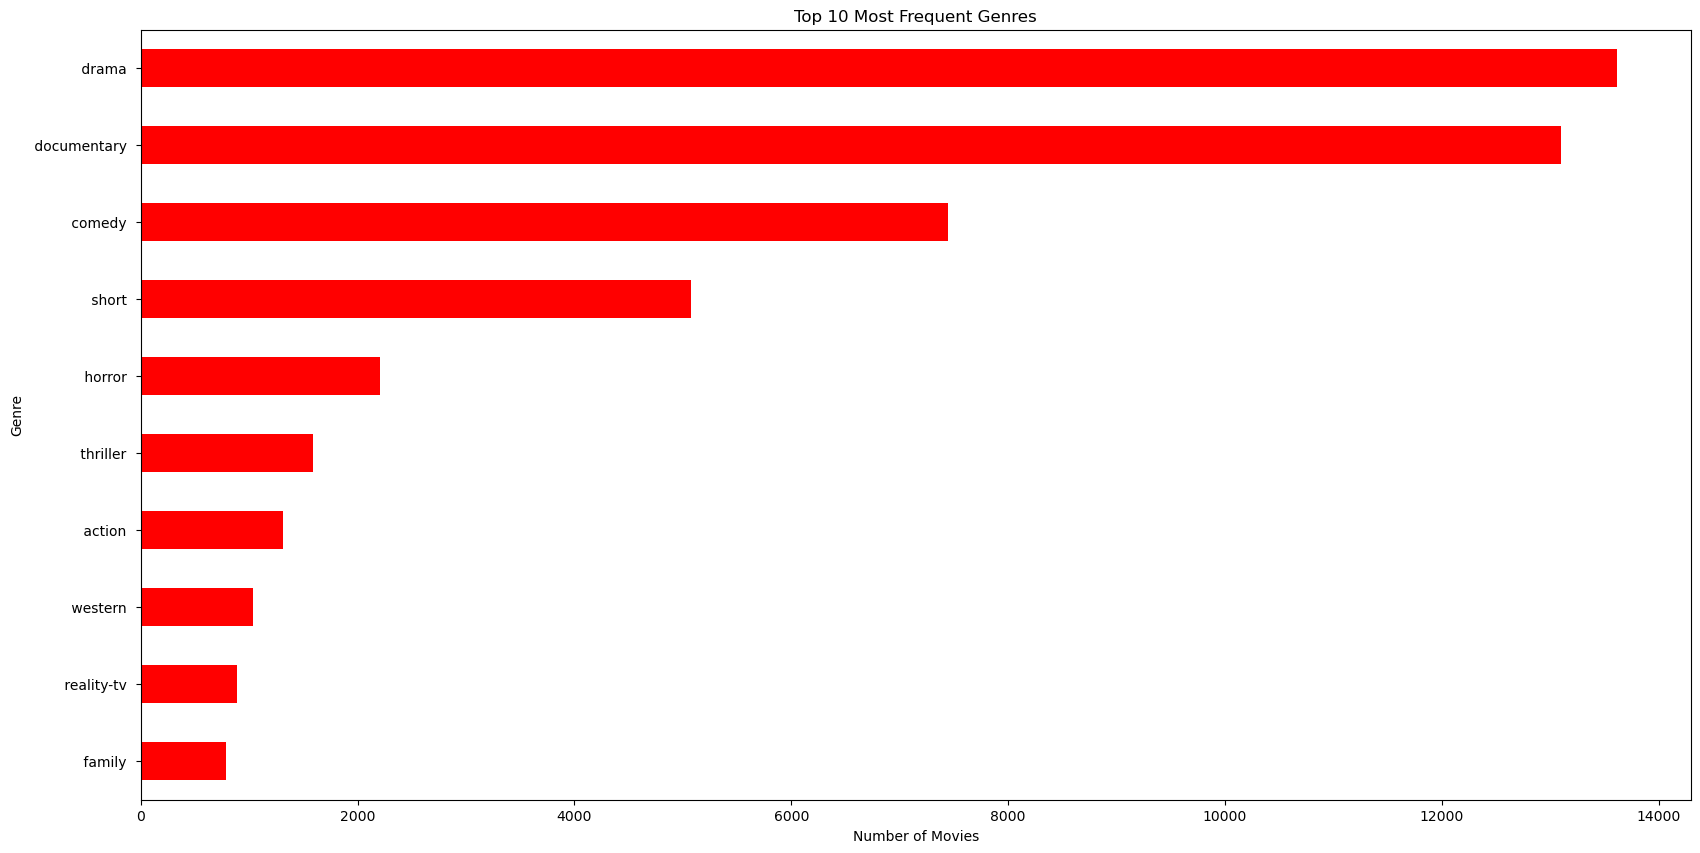

In [30]:
#To Know about top genre which is watched by many people
top_genres = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='Red')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

Training and Testing of the data

In [6]:
#To handle the missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

t = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t.fit_transform(train_data['DESCRIPTION'])
X_test = t.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

In [7]:
#to split the data
Xtrain, X, ytrain, y = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
from sklearn.svm import LinearSVC
lin = LinearSVC()
lin.fit(Xtrain, ytrain)

predict = lin.predict(X)
print(" Accuracy:", accuracy_score(y, predict))
print(" Classification Report:\n", classification_report(y,predict))


C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


 Accuracy: 0.5836945494789265
 Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
          16       0.43   

In [12]:
predict = lin.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, predict))
print("Test Classification Report:\n", classification_report(y_test,predict))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tejas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.naive_bayes import MultinomialNB
Mul = MultinomialNB()
Mul.fit(X_train, y_train)

MultinomialNB()

In [32]:
Mul.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

Predicting the genre of the movie

In [33]:
def predict_movie(description):
    t_v = t.transform([description])
    pred_label = lin.predict(t_v)
    return label_encoder.inverse_transform(pred_label)[0]
print("Movie-1")
sample_descr_for_movie = "Inspired by true events, 'Operation Valentine' follows legendary fighter pilot Wing Commander Arjun Dev and radar controller Wing Commander Ahana Gill as they navigate one of the most intense aerial battles in history."
print("Movie-1: ",predict_movie(sample_descr_for_movie))
print("Movie-2")
sample_descr_for_movie1 = "A movie unit ventures into a haunted mansion, unaware of the true dangers. They're shocked to experience supernatural incidents that mirror their script. "
print(predict_movie(sample_descr_for_movie1))

Movie-1
 action 
Movie-2
 horror 
